In [1]:
# !scp alfa:learn_to_prime/informative_eval_cleaned.tsv .

xstefan3@alfa's password: 


In [210]:
import pandas as pd
df = pd.read_csv("../informative_eval_cleaned_v2.tsv", sep="\t", names=["model", "random_demos", "informative_demos", "difference"])
df

,model,random_demos,informative_demos,difference
0,allenai/tk-instruct-base-def-pos,0.14516,0.42903,0.28387
1,allenai/tk-instruct-base-def-pos,0.35161,0.30968,-0.04194
2,allenai/tk-instruct-base-def-pos,0.06774,0.27742,0.20968
3,allenai/tk-instruct-base-def-pos,0.25161,0.47097,0.21935
4,allenai/tk-instruct-base-def-pos,0.25806,0.51290,0.25484
...,...,...,...,...
160,gaussalgo/mt5-large-priming-QA_en-cs,0.35806,0.46452,0.10645
161,gaussalgo/mt5-large-priming-QA_en-cs,0.34194,0.43871,0.09677
162,gaussalgo/mt5-large-priming-QA_en-cs,0.34839,0.42581,0.07742
163,gaussalgo/mt5-large-priming-QA_en-cs,0.34839,0.42258,0.07419


In [211]:
max_vals = df.groupby("model").max()["informative_demos"]
max_info_df = df[df.apply(lambda row: row["informative_demos"] == max_vals[row["model"]], axis=1)]
max_info_df

,model,random_demos,informative_demos,difference
7,allenai/tk-instruct-base-def-pos,0.25806,0.53871,0.28065
28,allenai/tk-instruct-large-def-pos,0.27742,0.48387,0.20645
32,allenai/tk-instruct-3b-def-pos,0.25484,0.56774,0.31290
53,allenai/mtk-instruct-3b-def-pos,0.30968,0.54839,0.23871
72,bigscience/T0_3B,0.39677,0.42903,0.03226
87,bigscience/T0_3B,0.39677,0.42903,0.03226
94,bigscience/T0pp,0.48710,0.42581,-0.06129
118,trained_models/SQuAD+SQAD_hard_base_ch2000,0.32581,0.47742,0.15161
127,trained_models/SQuAD+SQAD_random_base_ch5000,0.29032,0.38710,0.09677
140,trained_models/AQA+SQAD_random_large_ch6000,0.36774,0.53871,0.17097


<AxesSubplot:xlabel='model'>

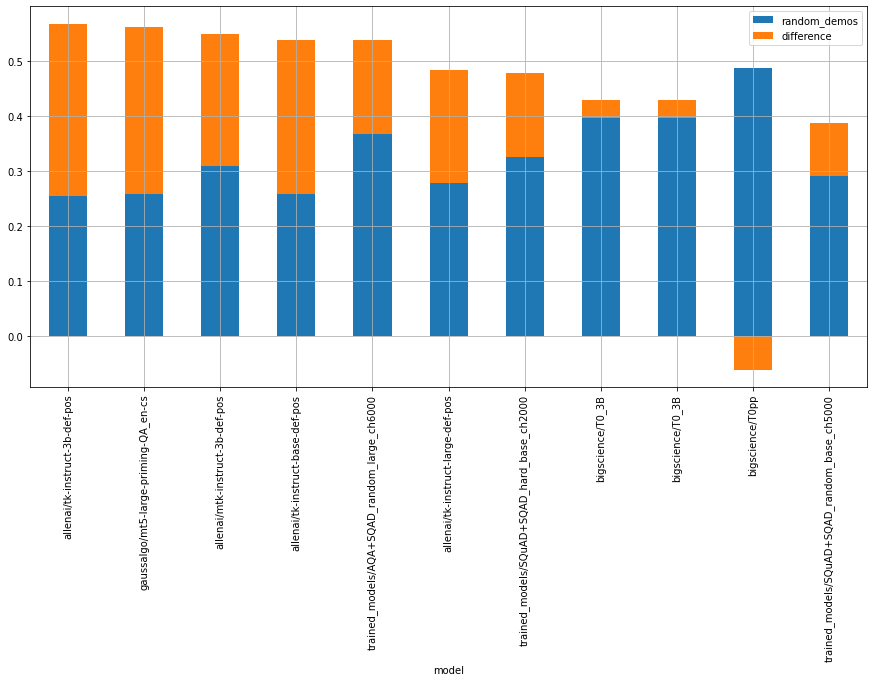

In [212]:
max_info_df.set_index("model", drop=True).sort_values(by="informative_demos", ascending=False)[["random_demos", "difference"]].plot.bar(stacked=True, grid=True, figsize=(15, 7))

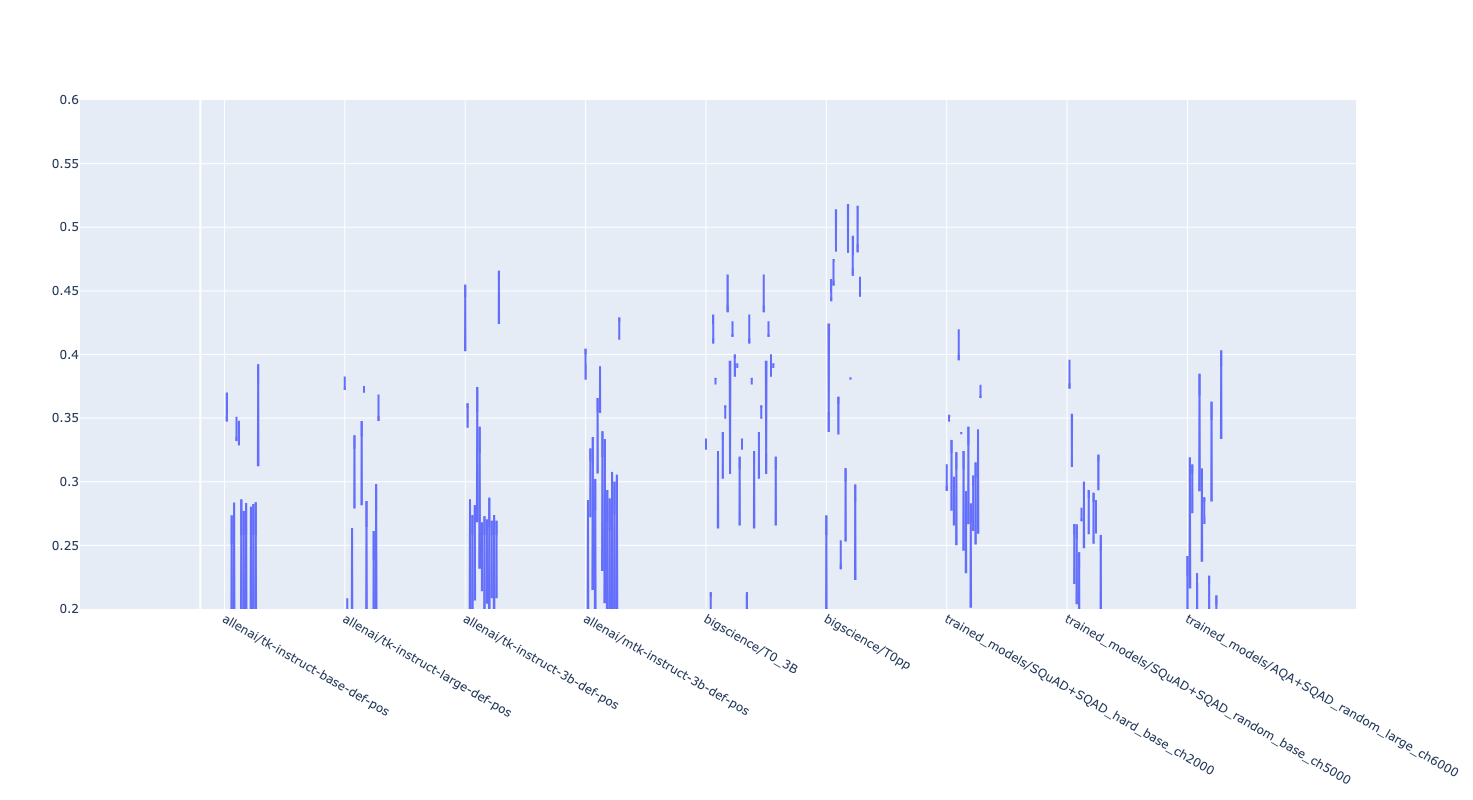

In [164]:
import plotly
import plotly.figure_factory as ff
import numpy as np

x = []
y = []
u = []
v = []
idx = []
offsets = []

for i, model_id in enumerate(df["model"].unique()):
    offset = i*50 + 10
    num_vals = len(df[df["model"] == model_id])
    
    x.extend(offset + np.arange(len(df[df["model"] == model_id]["random_demos"])))
    y.extend(df[df["model"] == model_id]["random_demos"])
    u.extend(np.zeros(num_vals))
    v.extend(df[df["model"] == model_id]["difference"])
    idx.append(model_id)
    offsets.append(offset)
    
    c.extend(['#ff0000']*len(df[df["model"] == model_id]["random_demos"]))

fig = ff.create_quiver(x, y, u, v, hovertemplate="Accuracy: %{y}", scale=0.1, arrow_scale=10, angle=1)
fig.update_layout(yaxis_range=[0.2,0.6], xaxis_range=[-50, 480], width=1200, height=800)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = offsets,
        ticktext = idx
    )
)

fig.show()